<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Пропущенные-значения" data-toc-modified-id="Пропущенные-значения-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Пропущенные значения</a></span></li><li><span><a href="#Дубликаты" data-toc-modified-id="Дубликаты-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Дубликаты</a></span></li><li><span><a href="#Типы-данных" data-toc-modified-id="Типы-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Типы данных</a></span></li><li><span><a href="#Подготовка-признаков" data-toc-modified-id="Подготовка-признаков-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Подготовка признаков</a></span><ul class="toc-item"><li><span><a href="#One-hot-encoding:-получение-дамми-признаков" data-toc-modified-id="One-hot-encoding:-получение-дамми-признаков-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>One-hot-encoding: получение дамми-признаков</a></span></li><li><span><a href="#Стандартизация" data-toc-modified-id="Стандартизация-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Стандартизация</a></span></li></ul></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li><li><span><a href="#Изменение-порога" data-toc-modified-id="Изменение-порога-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Изменение порога</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [ ]:
# Импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import math
import sklearn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import f1_score, mean_absolute_error, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
data = pd.read_csv('/datasets/Churn.csv')

<b>Признаки</b>:

* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — сколько лет человек является клиентом банка
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата

<b>Целевой признак</b>

* Exited — факт ухода клиента

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


<b>Наблюдения</b>

* При наличии идентификации по CustomerId столбцы RowNumber и Surname для целей нашего анализа кажутся избыточными. Их можно удалить.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


<b>Наблюдения</b>

* Имеет смысл привести Tenure к целочисленному типу данных: дробная часть нам вряд ли важна, при этом всегда важно экономить память.

### Пропущенные значения

Есть пропущенные значения в признаке Tenure - сколько лет человек является клиентом банка. Примем отсутствующее значение за 0: человек только-только стал клиентом банка.

In [ ]:
data['Tenure']=data['Tenure'].fillna(0)

In [ ]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Пропущенные значения отсутствуют.

### Дубликаты

In [ ]:
data.duplicated().sum()

0

Дубликаты строк отсутствуют.

### Типы данных

In [ ]:
# Приведем столбец Tenure к целочисленному типу данных
data['Tenure'] = data['Tenure'].astype('int')

### Подготовка признаков

In [ ]:
# Удалим из датафрейма избыточные столбцы Surname, CustomerId и RowNumber, не влияющие на целевой признак Exited
data_ohe = data.drop(['Surname', 'CustomerId', 'RowNumber'], axis=1)

Преобразуем категориальные признаки в количественные с помощью техники прямого кодирования OHE через функцию .get_dummies, избегая дамми-ловушки.

####  One-hot-encoding: получение дамми-признаков

In [ ]:
data_ohe = pd.get_dummies(data_ohe, drop_first=True)

In [ ]:
# Проверим преобразованный датафрейм
data_ohe.info()
data_ohe.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


Разобьем данные на обучающую, валидационную и тестовую выборки в отношении 3:1:1.

In [ ]:
target = data_ohe['Exited']
features = data_ohe.drop('Exited', axis=1)

features_train, features_rest, target_train, target_rest = train_test_split(features, target, test_size=.4, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_rest, target_rest, test_size=.5, random_state=12345)

In [ ]:
# Проверим форму полученных выборок
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(6000, 11)
(2000, 11)
(2000, 11)


 #### Стандартизация

Масштабируем признаки методом стандартизации.

In [ ]:
numeric = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure', 'NumOfProducts']

In [ ]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

## Исследование задачи

Обучим модели и измерим accuracy.

In [ ]:
# Логистическая регрессия
model = LogisticRegression(random_state=12345,solver = 'liblinear')
model.fit(features_train, target_train)
lr_predicted_valid = pd.Series(model.predict(features_valid))
model.score(features_valid, target_valid)

0.8025

In [ ]:
# Случайный лес
model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=12345)
model.fit(features_train, target_train)
forest_predicted_valid = pd.Series(model.predict(features_valid))
model.score(features_valid, target_valid)

0.8615

Изучим, хорош ли результат, полученный при доле правильных ответов 86%.

## Борьба с дисбалансом

Чтобы оценить адекватность модели, проверим, как часто в целевом признаке Exited встречается класс «1» или «0».

0    0.7963
1    0.2037
Name: Exited, dtype: float64


<AxesSubplot:>

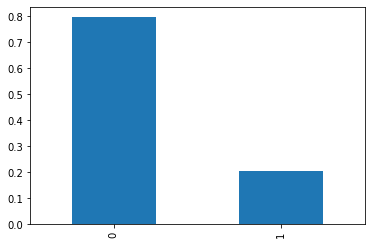

In [ ]:
class_frequency = data['Exited'].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

Наблюдается сильный дисбаланс классов. Классы несбалансированны: клиенты уходят в 20% процентах случаев, то есть положительный класс меньше отрицательного в 4 раза.

Проанализируем частоты классов в результатах предсказаний обеих моделей.

0    0.9125
1    0.0875
dtype: float64


<AxesSubplot:>

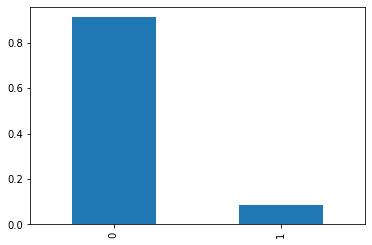

In [ ]:
# Для модели логистической регрессии
lr_class_frequency = lr_predicted_valid.value_counts(normalize=True)
print(lr_class_frequency)
lr_class_frequency.plot(kind='bar')

0    0.8955
1    0.1045
dtype: float64


<AxesSubplot:>

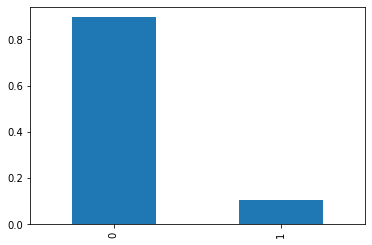

In [ ]:
# Для модели случайного леса
forest_class_frequency = forest_predicted_valid.value_counts(normalize=True)
print(forest_class_frequency)
forest_class_frequency.plot(kind='bar')

Модели предсказывают более оптимистичные перспективы оттока клиентов. Cравним их с работой константной модели.

In [ ]:
constant_target_prediction = pd.Series(0, target.index)
accuracy_score(target, constant_target_prediction)

0.7963

Проверка моделей на адекватность прошла успешно. Обученные модели предсказывают уход клиентов лучше, чем константная модель.

Для оценки качества прогноза положительного класса у моделей применим F1-меру.

In [ ]:
# F1-мера для модели логистической регрессии
f1_score(target_valid, lr_predicted_valid)

0.33389544688026984

In [ ]:
# F1-мера для модели случайного леса
f1_score(target_valid, forest_predicted_valid)

0.5582137161084529

<b>Промежуточные выводы</b>:

* классы несбалансированны
* клиенты уходят в 20% процентах случаев, то есть положительный класс меньше отрицательного в 4 раза
* результат работы модели случайного леса пока выглядит лучше

Постараемся достичь F1 не менее 0.59.

### Взвешивание классов

Сбалансируем классы с помощью аргумента class_weight

In [ ]:
# Для модели логистической регрессии
model = LogisticRegression(random_state=12345, solver = 'liblinear', class_weight='balanced')
model.fit(features_train, target_train)
lr_predicted_valid = pd.Series(model.predict(features_valid))
round(f1_score(target_valid, lr_predicted_valid), 3)

0.489

In [ ]:
# Для модели случайного леса
model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)
forest_predicted_valid = pd.Series(model.predict(features_valid))
round(f1_score(target_valid, forest_predicted_valid), 3)

0.627

### Уменьшение выборки

Сделаем объекты частого класса "0" не такими частыми. Применим технику балансирования классов downsampling, чтобы уменьшить число объектов большего класса путем случайного удаления объектов большего класса.

In [ ]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [ ]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

In [ ]:
# Проверим выравнивание частоты классов подбором аргумента frac=0.25
down_class_frequency = target_downsampled.value_counts(normalize=True)
print(down_class_frequency)

0    0.501043
1    0.498957
Name: Exited, dtype: float64


In [ ]:
# Для модели логистической регрессии
model = LogisticRegression(random_state=12345, solver = 'liblinear')
model.fit(features_downsampled, target_downsampled)
lr_predicted_valid_downsampled = model.predict(features_valid)
round(f1_score(target_valid, lr_predicted_valid_downsampled), 3)

0.489

In [ ]:
# Для модели случайного леса
model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=12345)
model.fit(features_downsampled, target_downsampled)
forest_predicted_valid_downsampled = model.predict(features_valid)
round(f1_score(target_valid, forest_predicted_valid_downsampled), 3)

0.592

Уменьшение выборки не дает убедительных результатов. Попробуем изменить порог.

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Модель случайного леса при пересмотренном аргументе frac показывает адекватный уровень F1-меры, но попробуем увеличить этот показатель.</div>

### Изменение порога

Путем изменения значения порога посмотрим, как изменится F1-мера.

In [ ]:
# Вероятности классов для логистической регрессии
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
lr_probabilities_valid = model.predict_proba(features_valid)
lr_probabilities_one_valid = lr_probabilities_valid[:, 1]

In [ ]:
# Функция подсчета F1 при различных значениях порога
def count_threshold (probabilities_one_valid):
    for threshold in np.arange(0, 0.6, 0.05):
        predicted_valid = probabilities_one_valid > threshold
        f1 = f1_score(target_valid, predicted_valid)
        print("Порог = {:.2f} | F1 = {:.3f}".format(
        threshold, f1))

In [ ]:
# Перебор значений порога для модели логистической регрессии
count_threshold(lr_probabilities_one_valid)

Порог = 0.00 | F1 = 0.346
Порог = 0.05 | F1 = 0.379
Порог = 0.10 | F1 = 0.422
Порог = 0.15 | F1 = 0.462
Порог = 0.20 | F1 = 0.479
Порог = 0.25 | F1 = 0.497
Порог = 0.30 | F1 = 0.488
Порог = 0.35 | F1 = 0.456
Порог = 0.40 | F1 = 0.401
Порог = 0.45 | F1 = 0.362
Порог = 0.50 | F1 = 0.334
Порог = 0.55 | F1 = 0.273


In [ ]:
# Вероятности классов для модели случайного леса
model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=12345)
model.fit(features_train, target_train)
forest_probabilities_valid = model.predict_proba(features_valid)
forest_probabilities_one_valid = forest_probabilities_valid[:, 1]

In [ ]:
# Перебор значений порога для модели случайного леса
count_threshold(forest_probabilities_one_valid)

Порог = 0.00 | F1 = 0.346
Порог = 0.05 | F1 = 0.392
Порог = 0.10 | F1 = 0.465
Порог = 0.15 | F1 = 0.543
Порог = 0.20 | F1 = 0.604
Порог = 0.25 | F1 = 0.636
Порог = 0.30 | F1 = 0.623
Порог = 0.35 | F1 = 0.634
Порог = 0.40 | F1 = 0.609
Порог = 0.45 | F1 = 0.590
Порог = 0.50 | F1 = 0.558
Порог = 0.55 | F1 = 0.532


Изменение порога показывает лучшие результаты, чем уменьшение выборки.

Для модели случайного леса найдем значения n_estimators и max_depth, при которых она будет показывать лучшие результаты.

In [ ]:
for depth in range(5, 11, 1):
    model = RandomForestClassifier(random_state=12345, n_estimators=20, max_depth=depth)
    model.fit(features_train, target_train)
    var_predictions_train = model.predict(features_train)
    var_predictions_valid = model.predict(features_valid)
    print("Accuracy при глубине =", depth)
    print("Обучающая выборка:", accuracy_score(target_train, var_predictions_train))
    print("Валидационная выборка:", accuracy_score(target_valid, var_predictions_valid))
    print()

Accuracy при глубине = 5
Обучающая выборка: 0.864
Валидационная выборка: 0.8535

Accuracy при глубине = 6
Обучающая выборка: 0.8713333333333333
Валидационная выборка: 0.859

Accuracy при глубине = 7
Обучающая выборка: 0.8785
Валидационная выборка: 0.855

Accuracy при глубине = 8
Обучающая выборка: 0.882
Валидационная выборка: 0.862

Accuracy при глубине = 9
Обучающая выборка: 0.893
Валидационная выборка: 0.8625

Accuracy при глубине = 10
Обучающая выборка: 0.9041666666666667
Валидационная выборка: 0.861



In [ ]:
for depth in range(10, 15, 1):
    model = RandomForestClassifier(random_state=12345, n_estimators=20, max_depth=depth)
    model.fit(features_train, target_train)
    var_predictions_train = model.predict(features_train)
    var_predictions_valid = model.predict(features_valid)
    var_f1 = f1_score(target_valid, var_predictions_valid)
    print("F1-мера при глубине =", depth)
    print(round(var_f1, 3))
    print()

F1-мера при глубине = 10
0.579

F1-мера при глубине = 11
0.579

F1-мера при глубине = 12
0.594

F1-мера при глубине = 13
0.578

F1-мера при глубине = 14
0.58



<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> При глубине случайного леса, равной 12, достигается необходимое значение F1-меры.</div>

In [ ]:
for est in range(40, 140, 20):
    model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth = 7)
    model.fit(features_train, target_train)
    var2_predictions_train = model.predict(features_train)
    var2_predictions_valid = model.predict(features_valid)
    print("Accuracy при n_estimators =", est)
    print("Обучающая выборка:", accuracy_score(target_train, var2_predictions_train))
    print("Валидационная выборка:", accuracy_score(target_valid, var2_predictions_valid))
    print()

Accuracy при n_estimators = 40
Обучающая выборка: 0.8786666666666667
Валидационная выборка: 0.856

Accuracy при n_estimators = 60
Обучающая выборка: 0.879
Валидационная выборка: 0.8605

Accuracy при n_estimators = 80
Обучающая выборка: 0.8795
Валидационная выборка: 0.861

Accuracy при n_estimators = 100
Обучающая выборка: 0.8801666666666667
Валидационная выборка: 0.8605

Accuracy при n_estimators = 120
Обучающая выборка: 0.8806666666666667
Валидационная выборка: 0.8605



In [ ]:
for est in range(20, 140, 20):
    model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth = 12)
    model.fit(features_train, target_train)
    var2_predictions_train = model.predict(features_train)
    var2_predictions_valid = model.predict(features_valid)
    var2_f1 = f1_score(target_valid, var2_predictions_valid)
    print("F1-мера при n_estimators =", est)
    print(round(var2_f1, 3))
    print()

F1-мера при n_estimators = 20
0.594

F1-мера при n_estimators = 40
0.595

F1-мера при n_estimators = 60
0.582

F1-мера при n_estimators = 80
0.571

F1-мера при n_estimators = 100
0.583

F1-мера при n_estimators = 120
0.576



<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> 
    
Необходимое значение F1-меры достигается в модели случайного леса при глубине 12 и параметре n_estimators 40.</div>

<b>ВЫВОДЫ:</b>

* лучшие результаты при борьбе с дисбалансом показало взвешивание классов class_weight
* следует продолжить работу с моделью случайного леса при n_estimators = 40 и max_depth = 12

## Тестирование модели

Обучим финальную модель и проверим её на тестовой выборке.

In [ ]:
# Модель случайного леса со взвешиванием классов
model_final = RandomForestClassifier(random_state=12345, n_estimators=40, max_depth = 9, class_weight='balanced')
model_final.fit(features_train, target_train)
predicted_test = model_final.predict(features_test)
round(f1_score(target_test, predicted_test), 3)

0.614

Требуемое значение F1-меры (>0.59) достигнуто.

Посчитаем площадь под ROC-кривой для модели AUC-ROC, чтобы понять, насколько ее точность отличается от случайной.

In [ ]:
probabilities_valid_final = model_final.predict_proba(features_valid)
probabilities_one_valid_final = probabilities_valid_final[:, 1]
round(roc_auc_score(target_valid, probabilities_one_valid_final), 3)

0.855

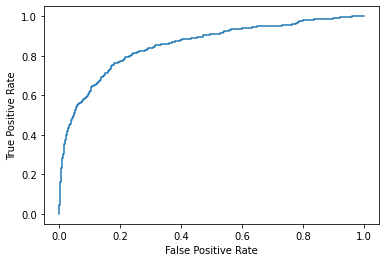

In [ ]:
fpr, tpr, _ = roc_curve(target_valid, probabilities_one_valid_final)

# Построим ROC-кривую
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Общий вывод

Данные изучены и подготовлены к исследованию:

* категориальные признаки преобразованы в численные с помощью техники прямого кодирования One-Hot Encoding
* подготовленный датасет разбит на обучающую, валидационную и тестовую выборки
* признаки отмасштабированы методом стандартизации

Исследован баланс классов:
 
* классы несбалансированны
* работа модели случайного леса показала лучшие результаты

Борьба с дисбалансом:

* применено три способа: аргумент class_weight, уменьшение выборки и изменение порога 
* class_weight показал лучший результат борьбы с дисбалансом
* выявлены лучшие значения n_estimators и max_depth для модели случайного леса

Финальная модель обучена и проверена на тестовой выборке. 
Достигнутое значение F1 = 0.61. 
Исследована метрика AUC-ROC. В нашем случае ее значение почти не отличается от значения для случайной модели (0.5).